### Hiearchical_Clustering

#### Average linkage
Average of All Distance between Members of Two Cluster

Problem Statement: Do Hiearchical Clustering to the for the following Dataset using Average Linkage

Dataset--> Universities.csv

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import the required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
Univ = pd.read_csv("C:/Users/Akaash/Downloads/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


Inference: 

Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping Univ Column as Object/string dtype is not required

#### Normalization Function

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1

#Fitting the Normalize Value and Droping the 'Univ' column as it is categorial
rescaledX = scaler.fit_transform(Univ.iloc[:,1:])

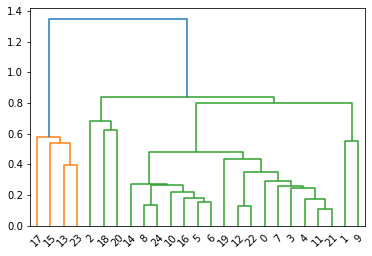

In [4]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(rescaledX, method='average'))

In [5]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

Inference: Creating No of Clusters = 4 , using Euclidean Distance, Linkage method = average

In [6]:
# save clusters for chart
y_hc = hc.fit_predict(rescaledX)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,3
1,2
2,0
3,3
4,3


In [7]:
#Appending the original Dataset with Clusters
Final = pd.concat([Univ,Clusters], axis = 1)
Final

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [8]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==3))

[array([ 0,  3,  4,  5,  6,  7,  8, 10, 11, 12, 14, 16, 19, 21, 22, 24],
       dtype=int64)]

##### Inference: Gives the List of Data Belonging to 3 Cluster

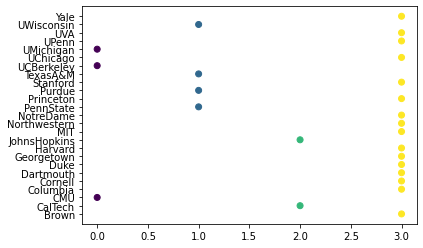

In [9]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Final['Clusters'],Final['Univ'], c = hc.labels_)

#### Centroid Linkage--(Distance between Center of Two Clusters)

Problem Statement: Do Hiearchical Clustering to the for the following Dataset using Centroid Linkage

In [10]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Universities.csv")
Dataset.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


Inference: 

Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping Univ Column as Object/string dtype is not required

#### Normalization Function

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1

#Fitting the Normalize Value and Droping the 'Univ' column as it is categorial
rescaledX = scaler.fit_transform(Dataset.iloc[:,1:])

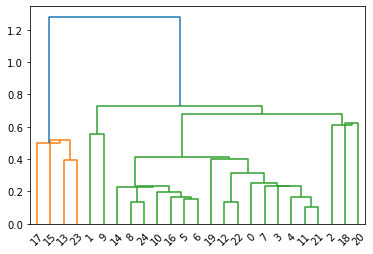

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(rescaledX, method='centroid'))

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')

Inference: Creating No of Clusters = 6 , using Euclidean Distance, Linkage method = centroid / ward

In [14]:
# save clusters for chart
y_hc = hc.fit_predict(rescaledX)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,3
1,5
2,0
3,3
4,3


In [15]:
#Appending the original Dataset with Clusters
Final = pd.concat([Univ,Clusters], axis = 1)
Final

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,5
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [16]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==4))

[array([ 5,  6,  8, 10, 14, 16, 24], dtype=int64)]

##### Inference: Gives the List of Data Belonging to 4 Cluster

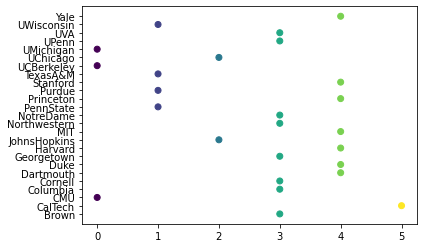

In [17]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Final['Clusters'],Final['Univ'], c = hc.labels_)